In [2]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = None
with open("frame6250_decoded.txt","r") as f:
    data = f.read()

In [4]:
data = data.split("\n")

In [88]:
from collections import OrderedDict
chh = 16
TIMES = []
ADCS = []
for line in data:
    line = line.split(",")
    if line[0] == '': continue    
    ch = int(line[0])
    if ch != chh:
        continue
    time = int(line[1])
    for adc in line[3:-1]:
        ADCS.append(int(adc))
        TIMES.append(time)
        time += 1 

In [89]:
print len(TIMES),len(ADCS)

3849 3849


In [106]:
#sequential ordering
sTIMES = []
offset = 0
changed = False

for ix,time in enumerate(TIMES):
    time = int(time)
    if ix == 0:
        sTIMES.append(TIMES[0])
        continue

    if prev_time > time and changed == False:
        print time,prev_time
        offset = prev_time
        changed = True

    if time > prev_time:
        changed = False
    
    prev_time = time

    sTIMES.append(offset + time)


73 4160
27 4013
83 3818


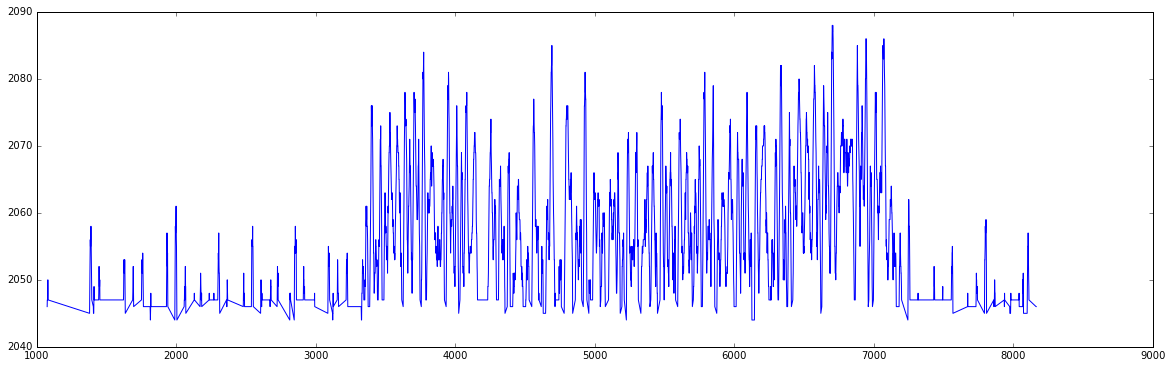

In [116]:
fig,ax = plt.subplots(figsize=(20,6))
ax.plot(sTIMES[:-100],ADCS[:-100],'-',lw=1)
plt.show()

In [82]:
TIMES[:1000][-1]

4046

4278